<a href="https://colab.research.google.com/github/liofval/GCI/blob/main/GCI%E3%83%98%E3%82%99%E3%83%BC%E3%82%B7%E3%83%83%E3%82%AF_%E6%BC%94%E7%BF%92_%E5%9B%9E%E5%B8%B0%E3%82%B3%E3%83%BC%E3%82%B9_%E3%83%AC%E3%83%98%E3%82%99%E3%83%AB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**回帰コース**


---


回帰コースでは、**数値を予測する機械学習モデル「線形回帰」**を取り扱い、**「データの理解→データの前処理→モデルの構築・評価」**という一連の流れを通して、各レベルに応じてデータ分析に必要な知識の習得を目指します。

#レベル３（★★★☆）


---
レベル3では、箱ひげ図を用いて外れ値を削除したデータでモデルを学習し、予測をします。

##3.1. データの前処理

これまで通り、以下のリンクから自動車価格のデータをダウンロードし、所定の位置にアップロードし、ファイルをデータフレームに読み込んで欠損値を削除しましょう。

[自動車価格Data.csv](https://drive.google.com/file/d/10gmRMbUVuDF8osJGdIop2b58PWDh7ezp/view?usp=drive_link)

In [ ]:
import pandas as pd

df = pd.read_csv('自動車価格Data.csv')
df = df.dropna()

今回は、箱ひげ図を用いることで、定量的に外れ値を定義します。よく用いられる基準として「Q1 - 1.5×IQR」未満のデータ、もしくは「Q3 + 1.5×IQR」より大きいデータを外れ値とするものがあります。ここで、IQRは四分位範囲のことで、（第3四分位数）－（第1四分位数）のことを指します。


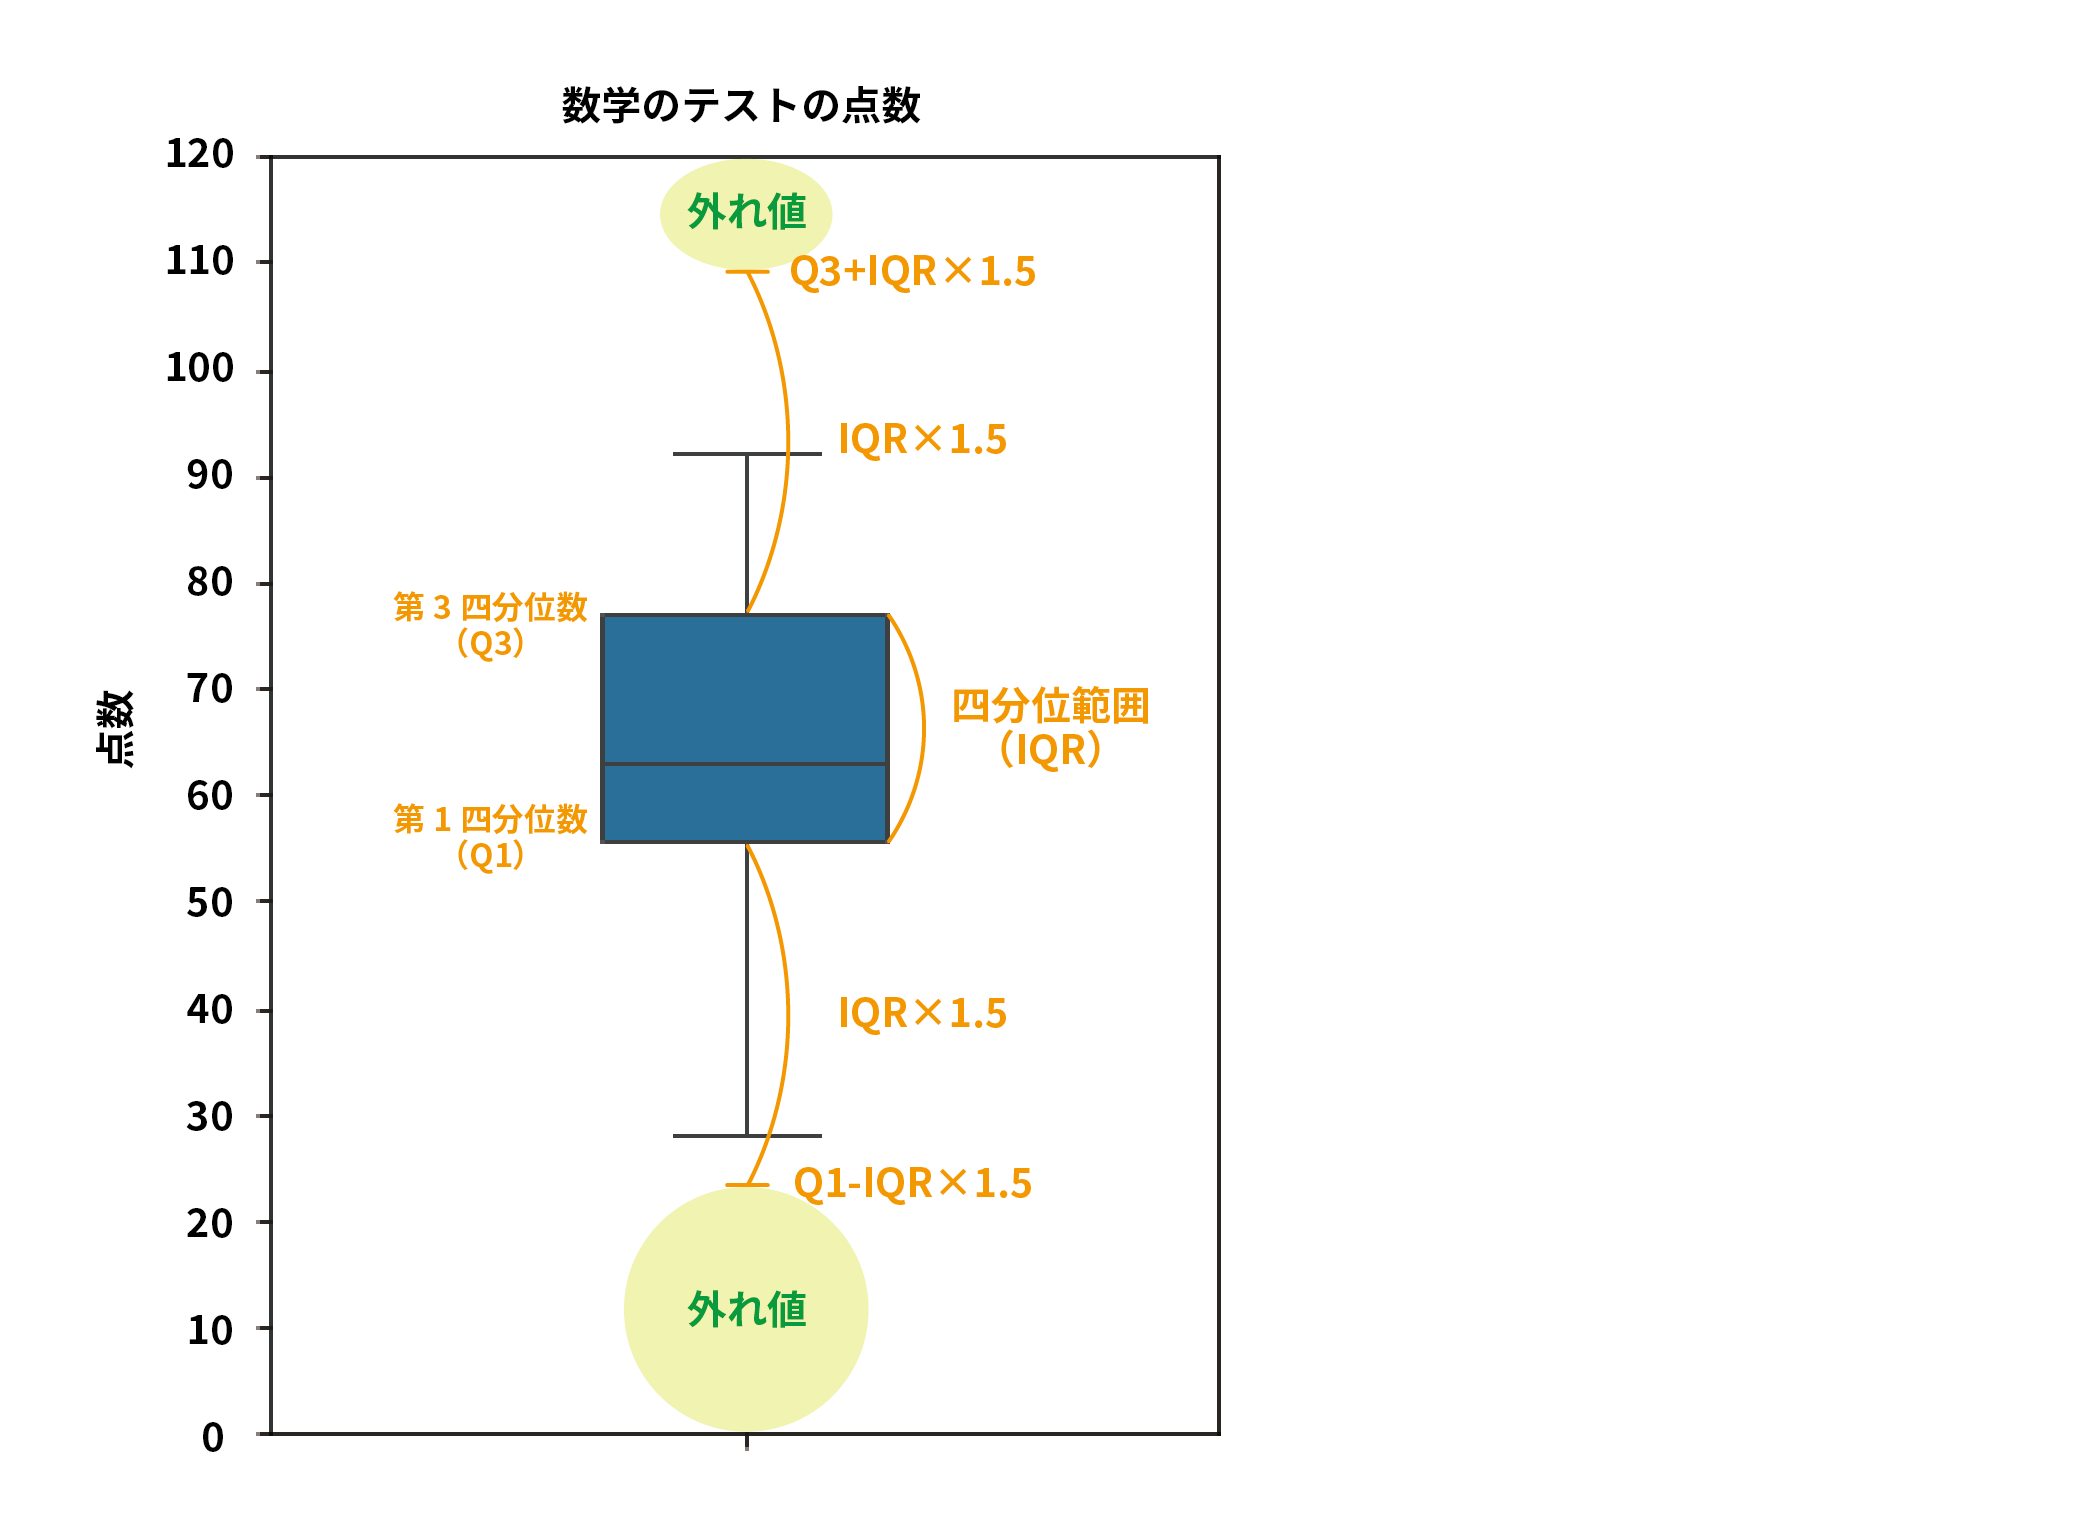

箱ひげ図を作成するために、matplotlibライブラリのpyplotモジュールとseabornライブラリをインポートします。

engine-size列の箱ひげ図を作成してみましょう。大枠の流れは散布図を作成した時と似ています。まずはfigure 関数を使って、プロットの横幅と縦幅を引数で指定します。boxplot 関数を用いて、プロットするデータである 'engine-size' 列を指定します。そして散布図を作成した時と同様に、ylabel関数でy軸のラベルを設定し、show関数で作成したプロットを表示します。
特に指定をしなければ、箱ひげ図上では先ほどの基準に沿って外れ値が◯で表示されます。


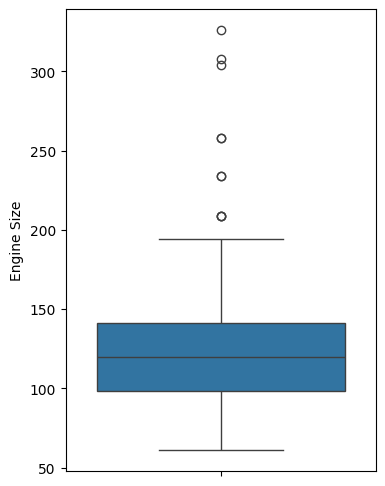

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 6))
sns.boxplot(y=df['engine-size'])
plt.ylabel('Engine Size')
plt.show()

基準に沿って6個の外れ値が表示されています。

次に今確認した基準に基づいて外れ値を削除します。

この上下限値の範囲内に収まらないデータを外れ値と見なし、それらを排除した新しいデータフレームを返します。

そのためにまずは、データフレームの中で今回外れ値を削除する対象のカラムを抽出し、describeメソッドを使用することで、各種統計量を出します。

In [ ]:
columns = ['engine-size', 'curb-weight', 'city-mpg']
desc = df[columns].describe()
desc

,engine-size,curb-weight,city-mpg
count,201.000000,201.000000,201.000000
mean,126.875622,2555.666667,25.179104
std,41.546834,517.296727,6.423220
min,61.000000,1488.000000,13.000000
25%,98.000000,2169.000000,19.000000
50%,120.000000,2414.000000,24.000000
75%,141.000000,2926.000000,30.000000
max,326.000000,4066.000000,49.000000


今回はこの中で第1四分位数の行と、第3四分位数の行をlocメソッドで取り出します。
locメソッドは [ ] 内でラベルを指定することでNumpyのように特定の行や列を取り出すことができます。

In [ ]:
Q1 = desc.loc['25%']
Q3 = desc.loc['75%']
Q1

,25%
engine-size,98.0
curb-weight,2169.0
city-mpg,19.0


次にQ3からQ1を引いて、IQRを定義します。また、外れ値に含まれない範囲として下限値はQ1から1.5倍のIQRを引いた値、上限値はQ3に1.5倍のIQRを加えた値として定義します。

In [ ]:
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound

,0
engine-size,33.5
curb-weight,1033.5
city-mpg,2.5


ここで列名を指定することで、その列に対応する下限値が出力されます。

In [ ]:
lower_bound['engine-size']

33.5

ここで今回は、'engine-size', 'curb-weight', 'city-mpg'のそれぞれに対して、外れ値の除去という同じ処理を施したいです。そういった別のカラムに同様の処理を繰り返し行う場合には、for文を使います。

for文とリストを組み合わせた簡単な例を以下に示しました。for文によって、リストの要素が取り出せていることがわかります。

In [ ]:
menu = ['salad', 'soup', 'steak', 'cake']
for food in menu:
    print(food)

salad
soup
steak
cake


外れ値削除の話に戻ります。まずは、処理を繰り返したい対象の列名をリストに入れます。


In [ ]:
columns = ['engine-size', 'curb-weight', 'city-mpg']

次にfor分の中身を考えないといけないのですが、こういった場合具体的な処理を考えることで考えやすくなります。engine-sizeに対して下限値と上限値の間に入っているものだけを残す処理は以下のようになります。

In [ ]:
df2 = df[(df['engine-size'] >= lower_bound['engine-size']) & (df['engine-size'] <= upper_bound['engine-size'])]

以下のfor文を実行するとまずは、リストの要素の一つ目であるengine-size列について、lower_bound以上かつupper_bound以下のデータが抽出されます。これにより、engine-sizeの外れ値が除去されます。

その後、同様の処理をリストに含まれるcurb-weightとcity-mpgの列にも繰り返されます。各列ごとに外れ値の除去を行うことで、最終的にこれら全ての列について外れ値が除去されたデータフレームが得られます。

In [ ]:
for column in columns:
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

今回は3列のみでしたが、繰り返す対象の数が多ければ多いほどfor文は力を発揮します。

これまで通り、データを説明変数と目的変数に分割します。

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

##3.2.モデルの構築＆評価

学習・評価方法はこれまでと同じです。

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print('各分割における決定係数:', scores)
print('交差検証の平均決定係数:', scores.mean())

各分割における決定係数: [0.67223837 0.68245826 0.6959365  0.72641292 0.46290575]
交差検証の平均決定係数: 0.6479903615798827


箱ひげ図を用いて外れ値を削除した結果、外れ値の処理を行わなかったレベル1や、散布図を用いて外れ値を削除したレベル2と比べると、精度が低下しました。
外れ値の処理が精度に与える影響の程度は、ケースバイケースであることが分かります。これは外れ値の削除に限った話ではありません。
モデルの精度を上げるためには、さまざまな手法を試してみることが重要です。


##3.3.演習問題

問3-1.以下のTable1のデータフレームを作成し、A列が10以上のデータを削除してください。

Table1

A| B
------|------|
5 | 8 |
12 |  9 |
7 |  6 |

問3-2.
下記リンクの「回帰コースLv3演習Data.csv」をダウンロードしてファイルをアップロードしてください。そして、
「Q1 - 2×IQR」未満のデータ、もしくは「Q3 + 2×IQR」より大きいデータを外れ値として、'engine-size'列の外れ値を削除してください。

[回帰コースLv3演習Data.csv](https://drive.google.com/file/d/1x_aqe2Ezns8buJjNmuEG6gwBfssiMfe8/view?usp=drive_link)